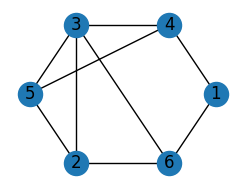

[1, 4, 5]


In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import networkx as nx
g = nx.Graph()
g.add_edge(1,4, weight = 2)
g.add_edge(4,3, weight = 9)
g.add_edge(3,5, weight = 8)
g.add_edge(5,2, weight = 8)
g.add_edge(2,3, weight = 9)
g.add_edge(3,6, weight = 11)
g.add_edge(6,2, weight = 7)
g.add_edge(6,1, weight = 5)
g.add_edge(4,5, weight = 2)

plt.subplot(2,2,1)
nx.draw_circular(g,with_labels = True)
plt.show()

short = nx.shortest_path(g, 1,5)
print(short)

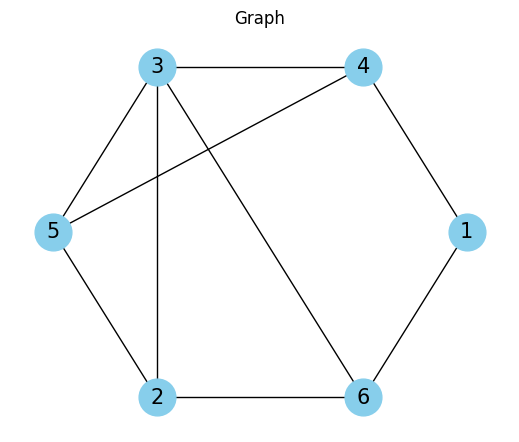

The shortest path from node 1 to node 5 is: [1, 4, 5]


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Create the graph
g = nx.Graph()
g.add_edge(1, 4, weight=2)
g.add_edge(4, 3, weight=9)
g.add_edge(3, 5, weight=8)
g.add_edge(5, 2, weight=8)
g.add_edge(2, 3, weight=9)
g.add_edge(3, 6, weight=11)
g.add_edge(6, 2, weight=7)
g.add_edge(6, 1, weight=5)
g.add_edge(4, 5, weight=2)

# Implement Dijkstra's algorithm using a BFS-like approach
def dijkstra(graph, start):
    # Priority queue to store the minimum distance and node
    queue = [(0, start)]
    # Dictionary to store the shortest path to each node
    distances = {node: float('infinity') for node in graph.nodes}
    # Dictionary to store the path
    previous_nodes = {node: None for node in graph.nodes}
    distances[start] = 0

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        # If the distance of the current node is greater than the stored distance, continue
        if current_distance > distances[current_node]:
            continue

        for neighbor, attributes in graph[current_node].items():
            weight = attributes['weight']
            distance = current_distance + weight

            # Only consider this new path if it's better
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous_nodes

def shortest_path(graph, start, target):
    distances, previous_nodes = dijkstra(graph, start)
    path = []
    current_node = target

    while current_node is not None:
        path.append(current_node)
        current_node = previous_nodes[current_node]

    path = path[::-1]
    return path

# Find the shortest path from node 1 to node 5
path = shortest_path(g, 1, 5)
path_edges = list(zip(path, path[1:]))

# Draw the graph and the shortest path
plt.figure(figsize=(5, 4))

nx.draw_circular(g, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
plt.title('Graph')
plt.show()

# Print the shortest path
print(f"The shortest path from node 1 to node 5 is: {path}")


The shortest path from node 1 to node 5 is: [1, 4, 5]


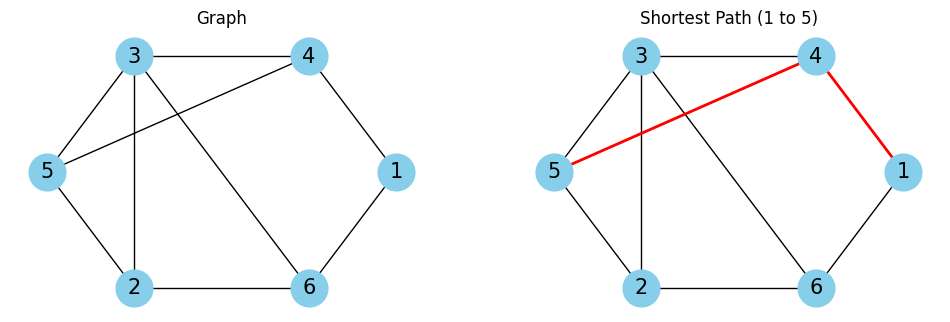

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
g = nx.Graph()
g.add_edge(1, 4, weight=2)
g.add_edge(4, 3, weight=9)
g.add_edge(3, 5, weight=8)
g.add_edge(5, 2, weight=8)
g.add_edge(2, 3, weight=9)
g.add_edge(3, 6, weight=11)
g.add_edge(6, 2, weight=7)
g.add_edge(6, 1, weight=5)
g.add_edge(4, 5, weight=2)

# Function to find shortest path from source to target using Dijkstra's algorithm without heapq
def dijkstra_shortest_path(graph, source, target):
    # Initialize distances and previous nodes in one loop
    distances = {}
    previous_nodes = {}
    for node in graph.nodes:
        distances[node] = float('inf')
        previous_nodes[node] = None
    distances[source] = 0

    # Priority queue as a list of (distance, node) tuples
    queue = [(0, source)]

    while queue:
        # Sort queue by distance (simple implementation of priority queue)
        queue.sort()
        current_dist, current_node = queue.pop(0)

        # Early exit if target is reached
        if current_node == target:
            break

        # Iterate over neighbors of current_node
        for neighbor in graph[current_node]:
            distance = current_dist + graph[current_node][neighbor]['weight']

            # Update distance and previous node if shorter path found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                queue.append((distance, neighbor))

    # Reconstruct path from source to target
    path = []
    current = target
    while current is not None:
        path.append(current)
        current = previous_nodes[current]
    path.reverse()

    return path

# Find the shortest path from node 1 to node 5
shortest_path = dijkstra_shortest_path(g, 1, 5)
print(f"The shortest path from node 1 to node 5 is: {shortest_path}")

# Highlight the shortest path
path_edges = list(zip(shortest_path, shortest_path[1:]))

# Draw the original graph and the shortest path
plt.figure(figsize=(12, 8))

# Draw the original graph
plt.subplot(2, 2, 1)
nx.draw_circular(g, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
plt.title('Graph')

# Draw the graph with the shortest path highlighted
plt.subplot(2, 2, 2)
pos = nx.circular_layout(g)
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
nx.draw_networkx_edges(g, pos, edgelist=path_edges, edge_color='r', width=2)
plt.title('Shortest Path (1 to 5)')

plt.show()


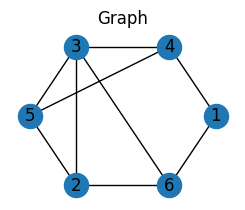

The shortest path from node 1 to node 5 is: [1, 4, 5]


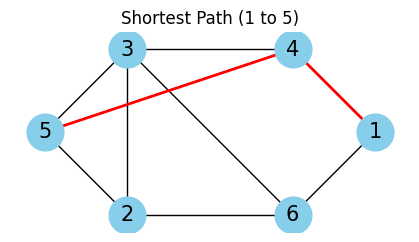

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Create the graph
g = nx.Graph()
g.add_edge(1, 4, weight=2)
g.add_edge(4, 3, weight=9)
g.add_edge(3, 5, weight=8)
g.add_edge(5, 2, weight=8)
g.add_edge(2, 3, weight=9)
g.add_edge(3, 6, weight=11)
g.add_edge(6, 2, weight=7)
g.add_edge(6, 1, weight=5)
g.add_edge(4, 5, weight=2)

plt.subplot(2, 2, 1)
plt.title('Graph')
nx.draw_circular(g, with_labels=True)
plt.show()

# Implement Dijkstra's algorithm
def dijkstra(gr, src):
    # Priority queue to store the minimum distance and node
    q = [(0, src)]
    dist = {}
    for node in gr.nodes:
        dist[node] = float('infinity')
    prev = {}
    for node in gr.nodes:
        prev[node] = None
    dist[src] = 0
    while q:
        cur_dist, cur_node = heapq.heappop(q)
        # If the distance of the current node is greater than the stored distance, continue
        if cur_dist > dist[cur_node]:
            continue
        for nbr, wt in gr[cur_node].items():
            new_dist = cur_dist + wt['weight']
            # Update distance and previous node if shorter path found
            if new_dist < dist[nbr]:
                dist[nbr] = new_dist
                prev[nbr] = cur_node
                heapq.heappush(q, (new_dist, nbr))
    return dist, prev
def find_shortest_path(gr, src, tgt):
    dist, prev = dijkstra(gr, src)
    path = []
    cur = tgt
    while cur is not None:
        path.append(cur)
        cur = prev[cur]
    path.reverse()
    return path
# Find the shortest path from node 1 to node 5
path = find_shortest_path(g, 1, 5)
print(f"The shortest path from node 1 to node 5 is: {path}")

# Highlight the shortest path
path_edges = list(zip(path, path[1:]))

# Draw the graph with the shortest path highlighted
plt.figure(figsize=(4,2))
pos = nx.circular_layout(g)
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=15)
nx.draw_networkx_edges(g, pos, edgelist=path_edges, edge_color='r', width=2)
plt.title('Shortest Path (1 to 5)')
plt.show()
